## Лабораторная работа №1
### Вариант 3
Выполнил Данилов Максим

1 Сбор данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/Лабораторная работа 1/03-25-14-csv-1.csv', sep=",", header=2, na_values=[-
9999])

2 Предобработка данных

In [3]:
data.dropna(axis=1, how='all', inplace=True)
data.dropna(axis=0, how='any', inplace=True)

3 EDA

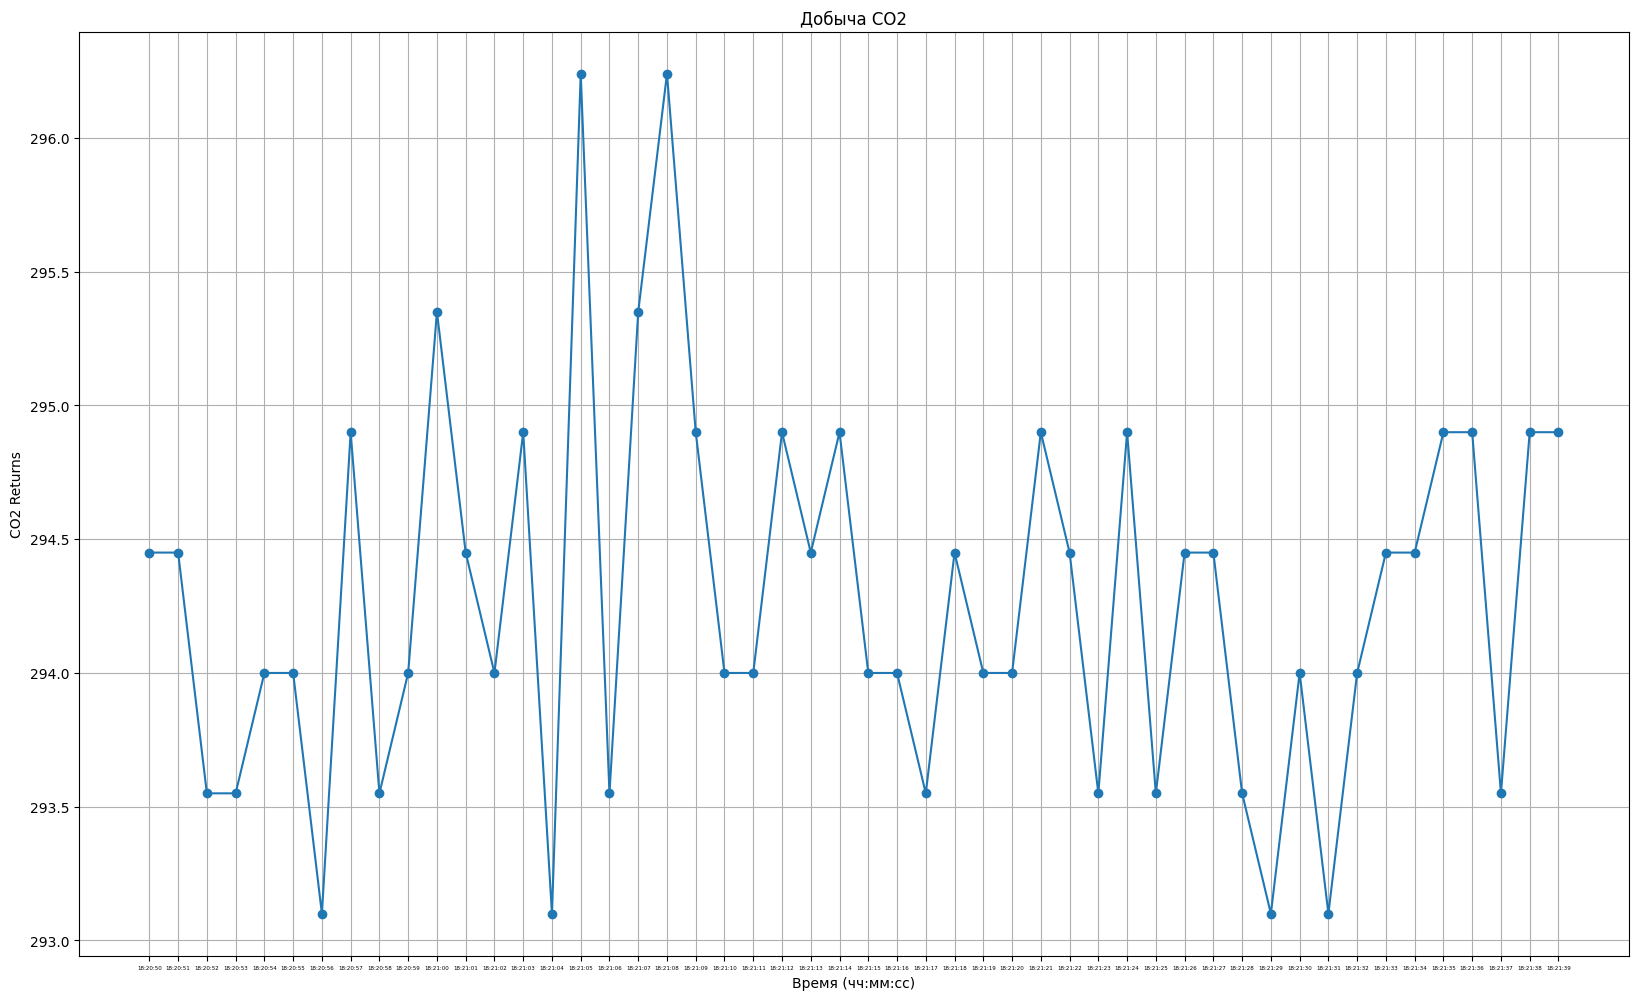

In [4]:
import matplotlib.pyplot as plt
# График расхода сырья по дням
plt.figure(figsize=(20, 12))
plt.plot(data['Time'][:50], data['CO2 Returns'][:50], marker='o')
plt.xlabel('Время (чч:мм:сс)')
plt.ylabel('CO2 Returns')
plt.title('Добыча CO2')
plt.tick_params(axis='x', labelsize=4)
plt.grid()
plt.show()

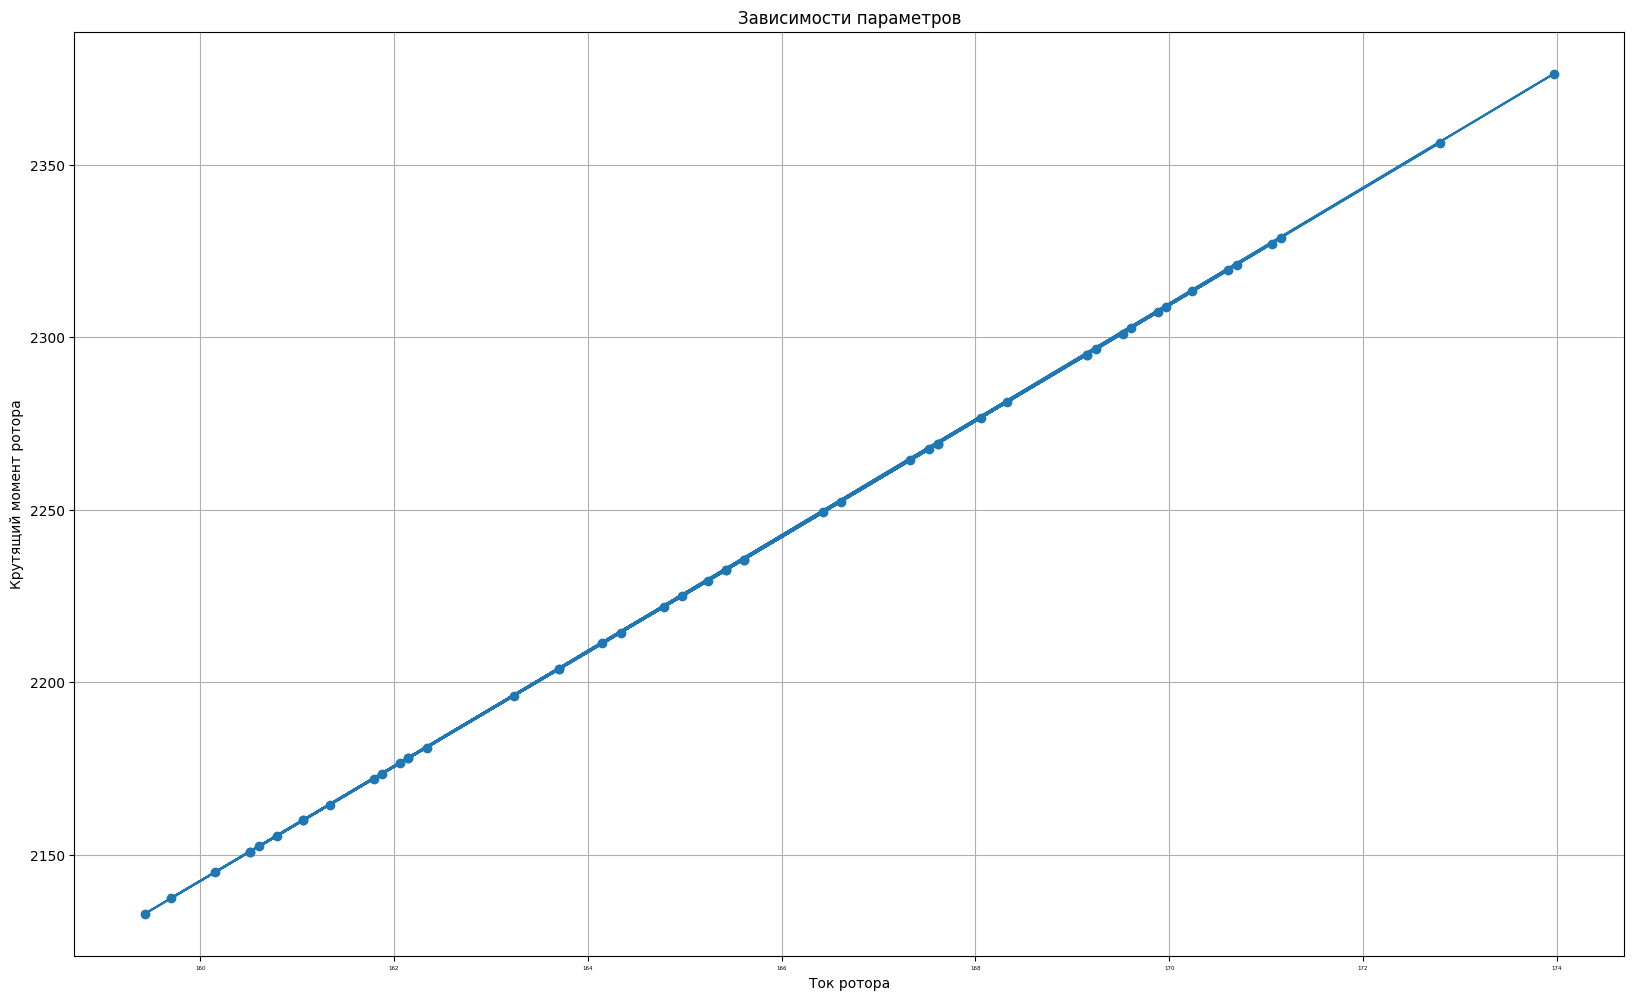

In [5]:
plt.figure(figsize=(20, 12))
plt.plot(data['Rotary Amps'][:50], data['Rotary Torq'][:50], marker='o')
plt.xlabel('Ток ротора')
plt.ylabel('Крутящий момент ротора')
plt.title('Зависимости параметров')
plt.tick_params(axis='x', labelsize=4)
plt.grid()
plt.show()

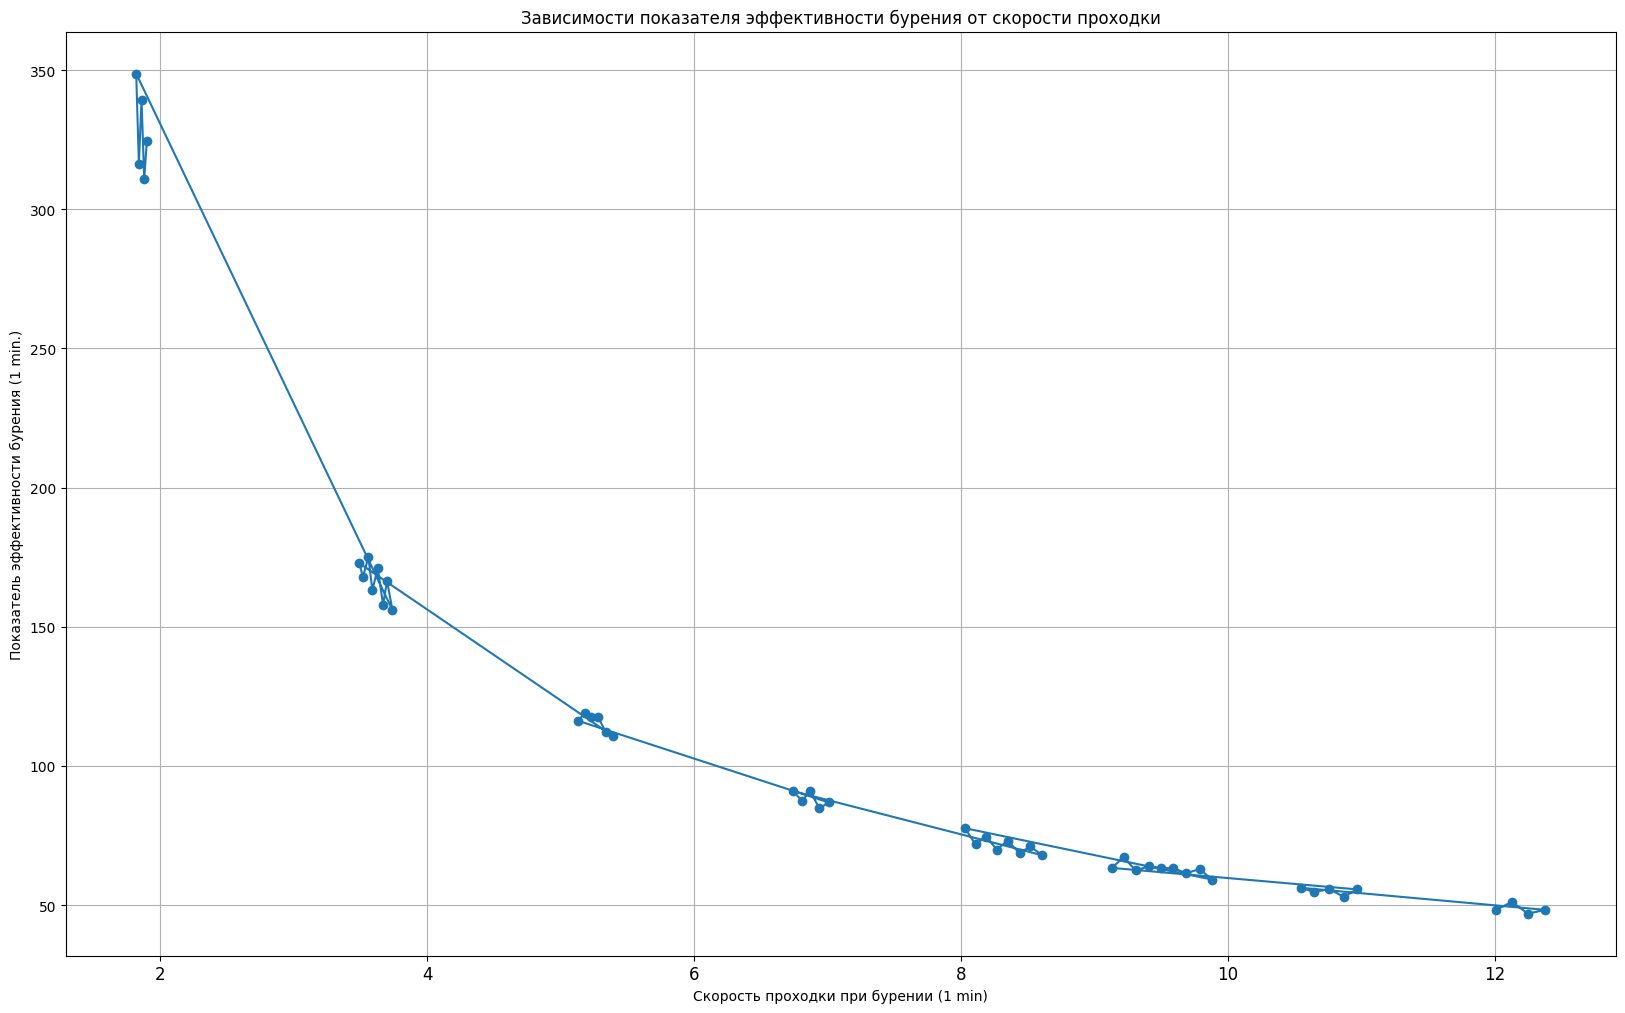

In [6]:
plt.figure(figsize=(20, 12))
plt.plot(data['ROP (1 min)'][:50], data['MSE (1 min.)'][:50], marker='o')
plt.xlabel('Cкорость проходки при бурении (1 min)')
plt.ylabel('Показатель эффективности бурения (1 min.)')
plt.title('Зависимости показателя эффективности бурения от скорости проходки')
plt.tick_params(axis='x', labelsize=12)
plt.grid()
plt.show()

4 Статистический анализ

In [7]:
# Проверка гипотезы: показатель эффективности бурения до и после повышения крутящего момент ротора
from scipy.stats import ttest_ind
before_optimization = data[data['Rotary Torq'] < 2000]['MSE (1 min.)']
after_optimization = data[data['Rotary Torq'] > 2000]['MSE (1 min.)']
t_stat, p_value = ttest_ind(before_optimization, after_optimization)
if p_value < 0.05:
    print("Различие статистически значимо.")
else:
    print("Различие не статистически значимо.")

Различие статистически значимо.


5 Моделирование

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
# Выбор признаков и целевой переменной
X = data[['Pump Press', 'Rotary Amps', 'Pump 1 SPM', 'Pit 1']]
y = data['Pressure Out']
# Разделение данных на обучающую и тестовую выборки в пропорции 80%/20%, включая предварительное перемешивание
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [11]:
# Создание и обучение модели
# 1 Определение полиномиальных признаков


poly = PolynomialFeatures(degree=4, include_bias=False)


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 2 Обучение линейной модели регресии
model = LinearRegression()

pipe = make_pipeline(scaler, poly, model)
pipe.fit(X_train, y_train)
print(mean_squared_error(y_test,pipe.predict(X_test)))
model.fit(X_train_poly, y_train)
# 3 Прогноз значений на тестовой и тренировочной выборках
y_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_train_poly)
# Вычислим среднюю квадратичную ошибку для выборок
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (train): {mse_train:.2f}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (test): {mse:.2f}")

0.04714887381871279
Mean Squared Error (train): 0.05
Mean Squared Error (test): 0.07


In [14]:
# Получение коэффициентов регрессии
coefficients = model.coef_
# Создание DataFrame для отображения коэффициентов и их соответствующих признаков
coef_df = pd.DataFrame({'Признак': poly.get_feature_names_out(X.columns),
'Коэффициент': coefficients})
# Сортировка по величине коэффициентов для определения значимости вклада каждого признака
sorted_coef_df =coef_df.reindex(coef_df['Коэффициент'].abs().sort_values(ascending=False).index)
sorted_coef_df 

,Признак,Коэффициент
3,Pit 1,2.567821e+03
1,Rotary Amps,1.097251e+03
11,Pump 1 SPM^2,2.781822e+02
12,Pump 1 SPM Pit 1,-1.744676e+02
0,Pump Press,-9.403250e+01
6,Pump Press Pump 1 SPM,2.269935e+01
13,Pit 1^2,-1.541804e+01
10,Rotary Amps Pit 1,-1.153956e+01
2,Pump 1 SPM,5.270679e+00
5,Pump Press Rotary Amps,-2.688108e+00


In [20]:
pipe['linearregression'].coef_
# Получение коэффициентов регрессии
coefficients =pipe['linearregression'].coef_
# Создание DataFrame для отображения коэффициентов и их соответствующих признаков
coef_df = pd.DataFrame({'Признак': pipe['polynomialfeatures'].get_feature_names_out(X.columns),
'Коэффициент': coefficients})
# Сортировка по величине коэффициентов для определения значимости вклада каждого признака
sorted_coef_df =coef_df.reindex(coef_df['Коэффициент'].abs().sort_values(ascending=False).index)
sorted_coef_df 

,Признак,Коэффициент
3,Pit 1,2.567821e+03
1,Rotary Amps,1.097251e+03
11,Pump 1 SPM^2,2.781822e+02
12,Pump 1 SPM Pit 1,-1.744676e+02
0,Pump Press,-9.403250e+01
6,Pump Press Pump 1 SPM,2.269935e+01
13,Pit 1^2,-1.541804e+01
10,Rotary Amps Pit 1,-1.153956e+01
2,Pump 1 SPM,5.270679e+00
5,Pump Press Rotary Amps,-2.688108e+00


## Задание

In [21]:
data.head()

,Date,Time,Depth,Block Height,Bit Depth,ROP (1 ft),ROP (1 min),WOB,Temp In,Temp Out,Air Temp Out,Pit Total,CO2 Returns,H2S Pits,Pump Press,Rotary Amps,Rotary Torq,Rotary Speed,Bit Speed,Hookload,Pump 1 SPM,Pump 2 SPM,Pump 3 SPM,MSE (1 ft.),MSE (1 min.),Total Gas,Gain/Loss,Flow In,Flow Out,Pressure Out,Well Head Pr,Ambient Temp,H2S Floor,O2 Floor,LEL Floor,H2S Cellar,O2 Cellar,LEL Cellar,H2S Derrick,O2 Derrick,CO Derrick,LEL Derrick,O2 Pits,LEL Pits,Pit 1,Pit 2,Pit 3,Pit 4,Pit 5,Pit 6,Pit 7,James Tube,Gas Sys Pr,SEGEP Flow,C Line Press,C Temp,105,Baseline DP,Fraction DP
0,3/25/2014,18:20:50,2348.42,11.0,2348.42,0.0,1.90,0.0,57.61,65.09,0.01,612.03,294.45,-0.17,542.38,169.15,2294.91,83.87,83.87,116.47,68.19,0.0,0,0.0,324.59,0,-44.04,454.39,3.69,0.17,-0.54,0,-0.16,-0.05,-3.25,-0.07,0,-0.05,0,0,0,0,0,7.36,181.04,74.75,91.64,144.71,-25.79,80.85,64.84,-11.85,0,0,0,0,0,1800,0
1,3/25/2014,18:20:51,2348.42,11.0,2348.42,0.0,1.88,0.0,57.65,65.02,0.01,611.78,294.45,-0.18,542.07,162.15,2177.99,83.81,83.81,116.62,68.23,0.0,0,0.0,310.89,0,-44.74,454.62,3.69,0.17,-0.54,0,-0.07,-0.05,-3.25,-0.04,0,-0.05,0,0,0,0,0,7.36,181.04,74.81,91.52,144.49,-25.79,80.88,64.83,-11.85,0,0,0,0,0,1800,0
2,3/25/2014,18:20:52,2348.42,11.0,2348.42,0.0,1.86,0.0,57.61,65.02,0.01,611.67,293.55,-0.16,541.77,172.79,2356.27,83.74,83.74,116.84,68.19,0.0,0,0.0,339.44,0,-44.98,454.39,3.69,0.13,-0.54,0,-0.09,-0.05,-3.25,-0.06,0,-0.05,0,0,0,0,0,7.36,181.04,74.82,91.68,144.34,-25.80,80.77,64.82,-11.85,0,0,0,0,0,1800,0
3,3/25/2014,18:20:53,2348.42,11.0,2348.42,0.0,1.84,0.0,57.65,64.94,0.01,611.41,293.55,-0.16,541.77,161.88,2173.47,83.79,83.79,117.07,68.16,0.0,0,0.0,316.39,0,-45.09,454.15,3.69,0.13,-0.54,0,-0.06,-0.05,-3.25,-0.02,0,-0.05,0,0,0,0,0,7.36,181.04,74.80,91.64,144.06,-25.79,80.87,64.78,-11.85,0,0,0,0,0,1800,0
4,3/25/2014,18:20:54,2348.42,11.0,2348.42,0.0,1.82,0.0,57.68,64.94,0.01,611.32,294.00,-0.13,541.46,173.97,2376.31,83.64,83.64,117.30,68.16,0.0,0,0.0,348.75,0,-45.36,454.15,3.69,0.09,-0.92,0,-0.12,-0.05,-3.25,0.05,0,-0.05,0,0,0,0,0,7.36,181.04,74.80,91.64,144.00,-25.79,80.91,64.73,-11.86,0,0,0,0,0,1800,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1851 non-null   object 
 1   Time          1851 non-null   object 
 2   Depth         1851 non-null   float64
 3   Block Height  1851 non-null   float64
 4   Bit Depth     1851 non-null   float64
 5   ROP (1 ft)    1851 non-null   float64
 6   ROP (1 min)   1851 non-null   float64
 7   WOB           1851 non-null   float64
 8   Temp In       1851 non-null   float64
 9   Temp Out      1851 non-null   float64
 10  Air Temp Out  1851 non-null   float64
 11  Pit Total     1851 non-null   float64
 12  CO2 Returns   1851 non-null   float64
 13  H2S Pits      1851 non-null   float64
 14  Pump Press    1851 non-null   float64
 15  Rotary Amps   1851 non-null   float64
 16  Rotary Torq   1851 non-null   float64
 17  Rotary Speed  1851 non-null   float64
 18  Bit Speed     1851 non-null 

In [26]:
data.describe()

,Depth,Block Height,Bit Depth,ROP (1 ft),ROP (1 min),WOB,Temp In,Temp Out,Air Temp Out,Pit Total,CO2 Returns,H2S Pits,Pump Press,Rotary Amps,Rotary Torq,Rotary Speed,Bit Speed,Hookload,Pump 1 SPM,Pump 2 SPM,Pump 3 SPM,MSE (1 ft.),MSE (1 min.),Total Gas,Gain/Loss,Flow In,Flow Out,Pressure Out,Well Head Pr,Ambient Temp,H2S Floor,O2 Floor,LEL Floor,H2S Cellar,O2 Cellar,LEL Cellar,H2S Derrick,O2 Derrick,CO Derrick,LEL Derrick,O2 Pits,LEL Pits,Pit 1,Pit 2,Pit 3,Pit 4,Pit 5,Pit 6,Pit 7,James Tube,Gas Sys Pr,SEGEP Flow,C Line Press,C Temp,105,Baseline DP,Fraction DP
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1.851000e+03,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.0,1851.000000,1851.000000,1851.0,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.0,1851.000000,1851.000000,1851.000000,1851.000000,1851.0,1851.000000,1851.0,1851.0,1851.0,1851.0,1851.0,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.0,1851.0,1851.0,1851.0,1851.0,1851.0,1851.0
mean,2351.254138,7.453857,2351.254138,11.379584,11.629562,27.315132,58.708260,62.902550,1.000000e-02,672.849897,294.327277,-0.191702,282.013755,184.720459,2621.893647,76.789914,76.789914,120.422183,9.919438,62.877482,0.0,62.939276,68.071664,0.0,16.176472,485.068882,2.182701,1.946721,-0.159806,0.0,-0.175143,-0.041464,-3.241464,-0.207639,0.0,-0.041464,0.0,0.0,0.0,0.0,0.0,7.351464,200.951729,82.594538,99.998476,158.608190,-25.818768,86.755824,69.762766,-11.850032,0.0,0.0,0.0,0.0,0.0,1800.0,0.0
std,1.853010,2.069021,1.853010,3.739081,3.717528,5.116980,0.564398,16.625074,1.735192e-18,48.783385,0.733265,0.026923,101.627069,59.249096,866.804648,21.867922,21.867922,1.513058,24.008192,26.057757,0.0,35.135304,60.714473,0.0,48.776907,18.013729,0.587813,1.202018,0.274377,0.0,0.049564,0.003536,0.003536,0.094946,0.0,0.003536,0.0,0.0,0.0,0.0,0.0,0.003536,13.968081,5.736948,6.868971,11.858734,0.014927,5.912219,4.640356,0.000569,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2348.420000,4.090000,2348.420000,0.000000,1.090000,0.000000,57.610000,35.130000,1.000000e-02,574.750000,291.310000,-0.270000,49.490000,2.010000,0.000000,0.000000,0.000000,113.450000,0.000000,0.000000,0.0,0.000000,0.210000,0.0,-82.020000,229.320000,1.860000,0.090000,-0.920000,0.0,-0.330000,-0.050000,-3.250000,-0.370000,0.0,-0.050000,0.0,0.0,0.0,0.0,0.0,7.350000,171.160000,70.660000,86.080000,135.300000,-25.850000,75.840000,61.240000,-11.860000,0.0,0.0,0.0,0.0,0.0,1800.0,0.0
25%,2349.470000,5.660000,2349.470000,11.470000,10.545000,27.330000,58.330000,39.440000,1.000000e-02,638.830000,294.000000,-0.210000,252.930000,195.690000,2752.745000,78.730000,78.730000,119.780000,0.000000,73.100000,0.0,57.260000,51.975000,0.0,-17.380000,487.070000,1.860000,0.930000,-0.160000,0.0,-0.210000,-0.040000,-3.240000,-0.260000,0.0,-0.040000,0.0,0.0,0.0,0.0,0.0,7.350000,191.085000,78.505000,95.065000,151.105000,-25.830000,81.650000,65.740000,-11.850000,0.0,0.0,0.0,0.0,0.0,1800.0,0.0
50%,2351.130000,7.420000,2351.130000,13.090000,12.550000,28.090000,58.830000,74.850000,1.000000e-02,673.800000,294.450000,-0.190000,267.870000,207.330000,2960.570000,84.900000,84.900000,120.610000,0.000000,73.280000,0.0,60.340000,61.520000,0.0,17.050000,488.270000,1.980000,2.950000,-0.160000,0.0,-0.180000,-0.040000,-3.240000,-0.240000,0.0,-0.040000,0.0,0.0,0.0,0.0,0.0,7.350000,202.160000,82.960000,100.070000,157.950000,-25.820000,86.650000,69.750000,-11.850000,0.0,0.0,0.0,0.0,0.0,1800.0,0.0
75%,2352.900000,9.090000,2352.900000,13.790000,13.730000,28.910000,59.210000,77.030000,1.000000e-02,710.630000,294.900000,-0.170000,270.620000,210.600000,3019.790000,86.210000,86.210000,121.440000,0.000000,73.530000,0.0,66.890000,69.685000,0.0,53.965000,489.960000,2.110000,3.060000,-0.160000,0.0,-0.150000,-0.040000,-3.240000,-0.200000,0.0,-0.040000,0.0,0.0,0.0,0.0,0.0,7.350000,211.850000,87.2

In [34]:
stats = data.describe()
std = stats.loc['std']
features_no_variance = list(std[std <= 0.001].index)
print(features_no_variance)

['Air Temp Out', 'Pump 3 SPM', 'Total Gas', 'Ambient Temp', 'O2 Cellar', 'H2S Derrick', 'O2 Derrick', 'CO Derrick', 'LEL Derrick', 'O2 Pits', 'James Tube', 'Gas Sys Pr', 'SEGEP Flow', 'C Line Press', 'C Temp', '105', 'Baseline DP', 'Fraction DP']


Оставим только числовые признаки с ненулевым стандартным отклонением

In [38]:
numeric_columns_zerostd = [x for x in list(data.select_dtypes(include = 'number').columns) if x not in features_no_variance] 
numeric_data = data[numeric_columns_zerostd] 
numeric_data.head()

,Depth,Block Height,Bit Depth,ROP (1 ft),ROP (1 min),WOB,Temp In,Temp Out,Pit Total,CO2 Returns,H2S Pits,Pump Press,Rotary Amps,Rotary Torq,Rotary Speed,Bit Speed,Hookload,Pump 1 SPM,Pump 2 SPM,MSE (1 ft.),MSE (1 min.),Gain/Loss,Flow In,Flow Out,Pressure Out,Well Head Pr,H2S Floor,O2 Floor,LEL Floor,H2S Cellar,LEL Cellar,LEL Pits,Pit 1,Pit 2,Pit 3,Pit 4,Pit 5,Pit 6,Pit 7
0,2348.42,11.0,2348.42,0.0,1.90,0.0,57.61,65.09,612.03,294.45,-0.17,542.38,169.15,2294.91,83.87,83.87,116.47,68.19,0.0,0.0,324.59,-44.04,454.39,3.69,0.17,-0.54,-0.16,-0.05,-3.25,-0.07,-0.05,7.36,181.04,74.75,91.64,144.71,-25.79,80.85,64.84
1,2348.42,11.0,2348.42,0.0,1.88,0.0,57.65,65.02,611.78,294.45,-0.18,542.07,162.15,2177.99,83.81,83.81,116.62,68.23,0.0,0.0,310.89,-44.74,454.62,3.69,0.17,-0.54,-0.07,-0.05,-3.25,-0.04,-0.05,7.36,181.04,74.81,91.52,144.49,-25.79,80.88,64.83
2,2348.42,11.0,2348.42,0.0,1.86,0.0,57.61,65.02,611.67,293.55,-0.16,541.77,172.79,2356.27,83.74,83.74,116.84,68.19,0.0,0.0,339.44,-44.98,454.39,3.69,0.13,-0.54,-0.09,-0.05,-3.25,-0.06,-0.05,7.36,181.04,74.82,91.68,144.34,-25.80,80.77,64.82
3,2348.42,11.0,2348.42,0.0,1.84,0.0,57.65,64.94,611.41,293.55,-0.16,541.77,161.88,2173.47,83.79,83.79,117.07,68.16,0.0,0.0,316.39,-45.09,454.15,3.69,0.13,-0.54,-0.06,-0.05,-3.25,-0.02,-0.05,7.36,181.04,74.80,91.64,144.06,-25.79,80.87,64.78
4,2348.42,11.0,2348.42,0.0,1.82,0.0,57.68,64.94,611.32,294.00,-0.13,541.46,173.97,2376.31,83.64,83.64,117.30,68.16,0.0,0.0,348.75,-45.36,454.15,3.69,0.09,-0.92,-0.12,-0.05,-3.25,0.05,-0.05,7.36,181.04,74.80,91.64,144.00,-25.79,80.91,64.73


## Выведем самые коррелируещие признаки с целевым значением  

In [45]:
import numpy as np
numeric_data.corr()['Pressure Out'].apply(np.abs).sort_values(ascending=False)

Pressure Out    1.000000
Block Height    0.889633
Depth           0.878927
Bit Depth       0.878927
Temp Out        0.782081
Pit 5           0.737861
Flow Out        0.701300
LEL Pits        0.625347
LEL Floor       0.625347
LEL Cellar      0.625347
O2 Floor        0.625347
Pump 1 SPM      0.624017
Pump 2 SPM      0.609694
H2S Cellar      0.571829
Rotary Torq     0.533794
Rotary Speed    0.531947
Bit Speed       0.531947
Rotary Amps     0.512752
ROP (1 ft)      0.499754
ROP (1 min)     0.441801
Hookload        0.387848
H2S Floor       0.379487
Flow In         0.335131
Pump Press      0.333255
H2S Pits        0.306069
WOB             0.259078
Well Head Pr    0.228998
Pit 6           0.157866
Pit 7           0.152651
Temp In         0.091438
Pit 4           0.086254
CO2 Returns     0.081972
MSE (1 ft.)     0.079732
Gain/Loss       0.061417
Pit Total       0.061095
Pit 3           0.045369
Pit 2           0.016307
MSE (1 min.)    0.013384
Pit 1           0.007158
Name: Pressure Out, dtype

In [53]:
#Оставим самый коррелирующий признак и 4 малокоррелирующих
X = numeric_data[['Block Height', 'Pit 1', 'Pit 2', 'Pit 3', 'Pit 4']]
y = numeric_data['Pressure Out']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
pipe = make_pipeline(scaler, poly, model)
pipe.fit(X_train, y_train)
print(f"Mean Squared Error (test): {mean_squared_error(y_test, pipe.predict(X_test)):.2f}")

Mean Squared Error (test): 0.05
